In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
url = 'https://raw.githubusercontent.com/aliceblueberry/covid19_sura/master/flight%20data.csv'
df = pd.read_csv(url)
df = df.drop(df.columns[[1,2,3,4,5,8,9,10,13,14,15,16]], axis = 1)
df = df.loc[df['PASSENGERS']>0]
df = df.reset_index(drop = True)

In [27]:
df = df.groupby(['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']).sum()
df.to_csv('clean_flight.csv')

(array([200.,  94., 111.,  62.,  45.,  76.,  61.,  40.,  46.,  29.,  42.,
         25.,  25.,  24.,  16.,  23.,  21.,  32.,  20.,  16.,  16.,  15.,
         12.,   6.,  12.,  14.,   9.,  13.,   7.,   6.,  10.,   8.,   7.,
          5.,   8.,   6.,   8.,   7.,   5.,   6.,   6.,   1.,   6.,   5.,
          5.,   4.,   6.,   4.,   4.,   6.,   4.,   4.,   7.,   6.,   3.,
          4.,   2.,   4.,   0.,   4.,   3.,   0.,   3.,   2.,   2.,   2.,
          2.,   2.,   1.,   2.,   0.,   2.,   1.,   1.,   1.,   2.,   1.,
          3.,   1.,   1.,   0.,   1.,   2.,   4.,   2.,   1.,   0.,   0.,
          2.,   3.,   1.,   1.,   0.,   0.,   2.,   0.,   2.,   0.,   0.,
          6.]), array([1.000000e+00, 9.963100e+02, 1.991620e+03, 2.986930e+03,
        3.982240e+03, 4.977550e+03, 5.972860e+03, 6.968170e+03,
        7.963480e+03, 8.958790e+03, 9.954100e+03, 1.094941e+04,
        1.194472e+04, 1.294003e+04, 1.393534e+04, 1.493065e+04,
        1.592596e+04, 1.692127e+04, 1.791658e+04, 1.891189e+04,

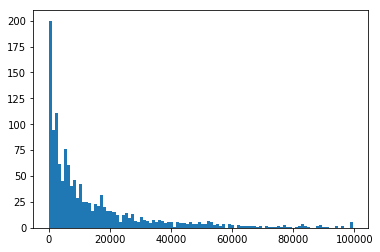

In [49]:
plt.hist(df[df['PASSENGERS']<100000]['PASSENGERS'], bins = 100)

In [16]:
def normalize(c):
    upper = c.max()
    lower = c.min()
    y = (c - lower)/(upper-lower)
    return y

In [29]:
df_normalized = df.copy()
df_normalized['PASSENGERS'] = normalize(np.log(df_normalized['PASSENGERS']))
df_normalized.rename(columns={'PASSENGERS': 'PASSENGERS_NORMALIZED'})

PASSENGERS_NORMALIZED
ORIGIN_STATE_ABR DEST_STATE_ABR                       
AK               AK                           0.867097
                 AZ                           0.553167
                 CA                           0.582268
                 CO                           0.585884
                 HI                           0.633841
                 MN                           0.596899
                 OR                           0.630873
                 WA                           0.808356
AL               AL                           0.118301
                 AZ                           0.425136
                 CO                           0.614209
                 FL                           0.666806
                 GA                           0.772554
                 IL                           0.658954
                 KY                           0.188535
                 MD                           0.526296
                 MI                           0.597161
                 NC                           0.702899
                 NJ                           0.143033
                 NV                           0.553207
                 NY                           0.541047
                 PA                           0.516408
                 SC                           0.250003
                 TX                           0.758254
                 VA                           0.630195
AR               AZ                           0.557027
                 CA                           0.521762
                 CO                           0.639207
                 FL                           0.577189
                 GA                           0.701527
...                                                ...
WI               TN                           0.587838
                 TX                           0.694823
                 UT                           0.539964
                 VA                           0.587342
                 WA                           0.547142
                 WI                           0.377935
WV               FL                           0.614295
                 GA                           0.591055
                 IL                           0.563638
                 MA                           0.080753
                 MD                           0.361640
                 NC                           0.622296
                 OH                           0.287551
                 PA                           0.467963
                 TN                           0.337015
                 VA                           0.476086
                 WV                           0.442214
WY               CA                           0.589766
                 CO                           0.704200
                 GA                           0.569894
                 IL                           0.614536
                 MA                           0.101899
                 NE                           0.227205
                 NJ                           0.536716
                 NY                           0.430162
                 OK                           0.261334
                 TX                           0.593705
                 UT                           0.646847
                 WA                           0.287551
                 WY                           0.475859

[1401 rows x 1 columns]